In [291]:
%matplotlib inline
import matplotlib.pyplot as plt
import pylab as py
import numpy as np
from imp import reload
import pixie_read_st as pxr

In [510]:
plt.style.use('ggplot')
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'heavy'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['text.usetex']=True

In [293]:
#filepath = "/net/scratch3/giannis_kx/pixie3d/tests/bonfiglio_div_tok/python_arrays/"
filepath = "/net/scratch3/giannis_kx/pixie3d/tests/sawtooth/python_arrays/"

## Q-Profile

In [511]:
q = np.load(filepath+"q_mpi.npy")

In [512]:
q.shape

(99, 700)

In [627]:
psi_list = np.linspace(0.0,1.0,101)
time = np.linspace(0,700,700)

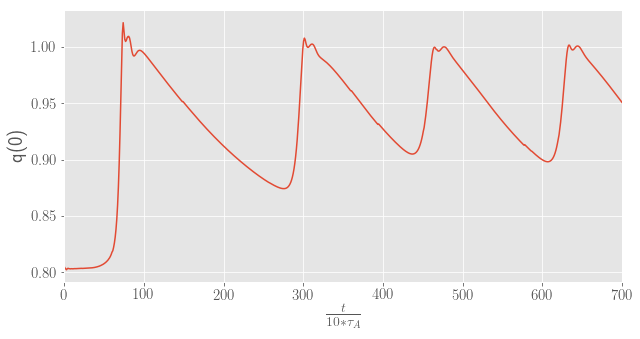

In [629]:
plt.figure(figsize=(10,5))
plt.plot(time[0:],-q[0,0:])
plt.xlabel(r"$\frac{t}{10*\tau_A}$")
plt.ylabel("q(0)")
plt.xlim(0,700)
plt.show()

## (n,m) modes

In [515]:
def nm_array(b_hat_rho):
    b_hat_rho = (1/(2*np.pi))*b_hat_rho
    c = (1/(2*np.pi))**2 # Normalization factor
    bnt = [] # n-transform
    for r in range(b_hat_rho.shape[0]):
        for uf in range(b_hat_rho.shape[1]):
            for time in range(b_hat_rho.shape[3]):
                bnt.append(np.fft.fft(b_hat_rho[r,uf,:,time]))
    bnt = np.reshape(np.asarray(bnt),(b_hat_rho.shape[0],b_hat_rho.shape[1],b_hat_rho.shape[3],b_hat_rho.shape[2]))
    bnt = np.swapaxes(bnt,2,3)
    
    bnmt = [] # m-transform
    for r in range(b_hat_rho.shape[0]):
        for fn in range(b_hat_rho.shape[2]):
            for time in range(b_hat_rho.shape[3]):
                bnmt.append(np.fft.fft(bnt[r,:,fn,time]))
    bnmt = np.reshape(np.asarray(bnmt),(b_hat_rho.shape[0],b_hat_rho.shape[2],b_hat_rho.shape[3],b_hat_rho.shape[1]))
    bnmt = np.swapaxes(bnmt,2,3)
    bnmt = c*bnmt
    return bnmt

In [516]:
b_hat_rho = np.load(filepath + "b_hat_rho_mpi_new.npy")

In [517]:
b_hat_rho.shape

(101, 65, 65, 700)

In [518]:
time_list = [x for x in range(700)]

In [519]:
psin_list = np.linspace(0.0,1.0,101)

In [520]:
bnmt = nm_array(b_hat_rho)

## Spatial 

## t = 457

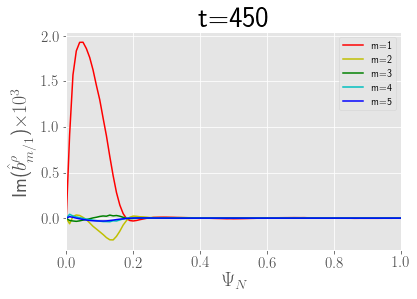

In [621]:
time_stamp = 450
plt.title('t=%s'%(time_stamp))
plt.plot(psin_list,np.asarray(bnmt[:,-1,1,time_stamp]*1.0e3).imag,'r',label='m=1')
plt.plot(psin_list,np.asarray(bnmt[:,-2,1,time_stamp]*1.0e3).imag,'y',label='m=2')
plt.plot(psin_list,np.asarray(bnmt[:,-3,1,time_stamp]*1.0e3).imag,'g',label='m=3')
plt.plot(psin_list,np.asarray(bnmt[:,-4,1,time_stamp]*1.0e3).imag,'c',label='m=4')
plt.plot(psin_list,np.asarray(bnmt[:,-5,1,time_stamp]*1.0e3).imag,'b',label='m=5')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)$\times 10^3$')

plt.xlim(0.0,1.0)
plt.legend()
plt.show()

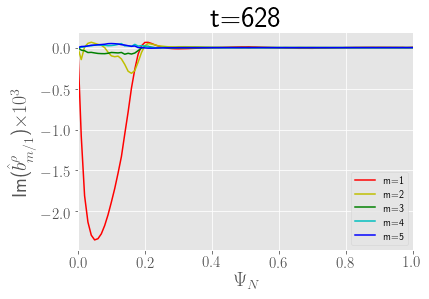

In [522]:
time_stamp = 628
plt.title('t=%s'%(time_stamp))
plt.plot(psin_list,np.asarray(bnmt[:,-1,1,time_stamp]*1.0e3).imag,'r',label='m=1')
plt.plot(psin_list,np.asarray(bnmt[:,-2,1,time_stamp]*1.0e3).imag,'y',label='m=2')
plt.plot(psin_list,np.asarray(bnmt[:,-3,1,time_stamp]*1.0e3).imag,'g',label='m=3')
plt.plot(psin_list,np.asarray(bnmt[:,-4,1,time_stamp]*1.0e3).imag,'c',label='m=4')
plt.plot(psin_list,np.asarray(bnmt[:,-5,1,time_stamp]*1.0e3).imag,'b',label='m=5')
plt.xlabel(r'$\Psi_N$')
plt.ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)$\times 10^3$')
plt.xlim(0.0,1.0)
plt.legend()
plt.show()

## Time Series

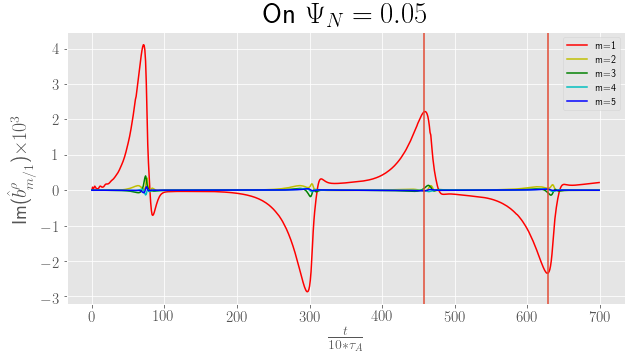

In [630]:
psi_val = 0.05
n = 1
m = -1
plt.figure(figsize=(10,5))
psi_pos = int(100*psi_val)
plt.title(r"On $\Psi_N =  %s$"%(psi_val))
plt.plot(time_list,(bnmt[psi_pos,m,n,:].imag)*1.0e3,'r',label='m=1')
plt.plot(time_list,(bnmt[psi_pos,m-1,n,:].imag)*1.0e3,'y',label='m=2')
plt.plot(time_list,(bnmt[psi_pos,m-2,n,:].imag)*1.0e3,'g',label='m=3')
plt.plot(time_list,(bnmt[psi_pos,m-3,n,:].imag)*1.0e3,'c',label='m=4')
plt.plot(time_list,(bnmt[psi_pos,m-4,n,:].imag)*1.0e3,'b',label='m=5')
plt.axvline(x=457)
plt.axvline(x=628)
plt.xlabel(r'$\frac{t}{10*\tau_A}$')
plt.ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)$\times 10^3$')
plt.legend()
plt.show()

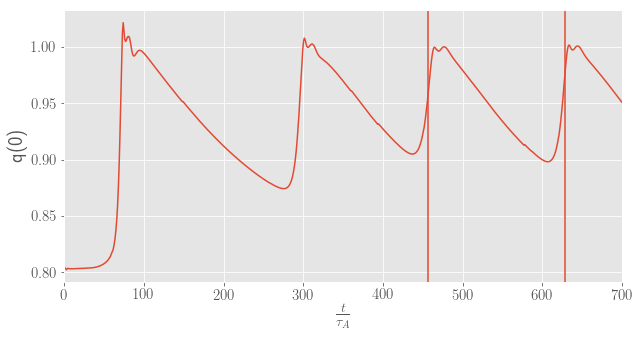

In [395]:
plt.figure(figsize=(10,5))
plt.plot(time[0:],-q[0,0:])
plt.axvline(x=457)
plt.axvline(x=628)
plt.xlabel(r"$\frac{t}{\tau_A}$")
plt.ylabel("q(0)")
plt.xlim(0,700)
plt.show()

In [524]:
from matplotlib import animation, rc
import matplotlib.animation as animation
import types
from IPython.display import HTML

In [613]:
def anim():
    fig,ax = plt.subplots(figsize=(10,10))
    #ax.set_aspect('equal')
    ax.set_xlabel(r'$\Psi_N$')
    ax.set_ylabel(r'Im($\hat{b}^{\rho}_{m/1}$)$\times 10^3$')
    ax.plot([],[],'r',label='m=1')
    ax.plot([],[],'y',label='m=2')
    ax.plot([],[],'g',label='m=3')
    ax.plot([],[],'c',label='m=4')
    ax.plot([],[],'b',label='m=5')
    ax.legend()
    ims = []
    for time_stamp in range(700):
        im1, = ax.plot(psin_list,np.asarray(bnmt[:,-1,1,time_stamp]*1.0e3).imag,'r')
        im2, = ax.plot(psin_list,np.asarray(bnmt[:,-2,1,time_stamp]*1.0e3).imag,'y')
        im3, = ax.plot(psin_list,np.asarray(bnmt[:,-3,1,time_stamp]*1.0e3).imag,'g')
        im4, = ax.plot(psin_list,np.asarray(bnmt[:,-4,1,time_stamp]*1.0e3).imag,'c')
        im5, = ax.plot(psin_list,np.asarray(bnmt[:,-5,1,time_stamp]*1.0e3).imag,'b')
        text = 't = '+str(time_stamp)

        an = ax.annotate(text, xy=(0.8, 0.94), xycoords='axes fraction',fontsize=14)
        ims.append([im1]+[im2]+[im3]+[im4]+[im5]+[an])

    art_ani = animation.ArtistAnimation(fig, ims, interval=100, repeat_delay=100,blit=False)
    return art_ani

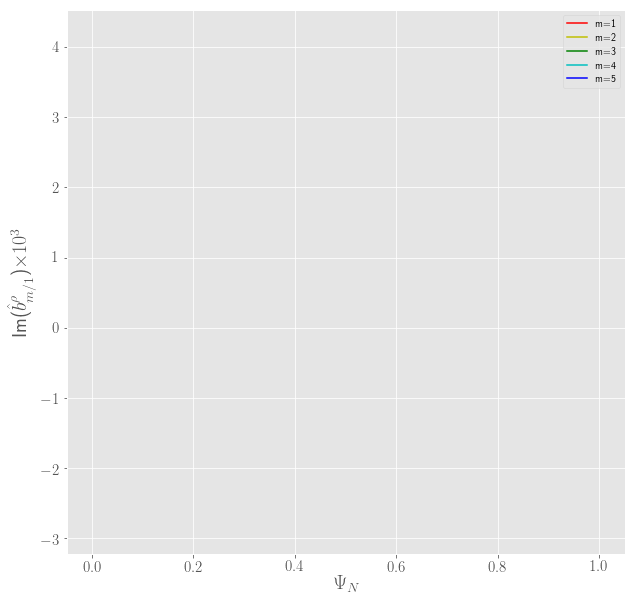

In [614]:
ani = anim();

In [615]:
HTML(ani.to_html5_video())

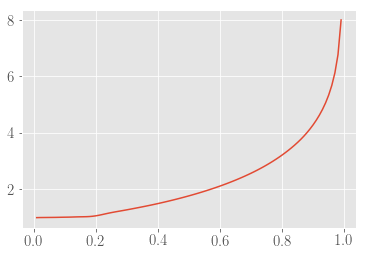

In [617]:
plt.plot(psin_list[1:-1],-q[:,472])
plt.show()